In [1]:
import pandas as pd
df = pd.read_csv('international-airline-passengers.csv',header=None,skiprows=[0])

In [2]:
df.columns = ['year','passengers']

In [3]:
df.head(5)

year  passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

In [4]:
df.describe()

passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000

In [5]:
print('Time period start: {}\nTime period end: {}'.format(df.year.min(),df.year.max()))

Time period start: 1949-01
Time period end: 1960-12


In [6]:
df.columns

Index(['year', 'passengers'], dtype='object')

In [7]:
df.shape

(144, 2)

In [8]:
df['year'] = pd.to_datetime(df['year'], format='%Y-%m')

In [9]:
y = df.set_index('year')

In [10]:
y.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='year', length=144, freq=None)

In [11]:
y.isnull().sum()

passengers    0
dtype: int64

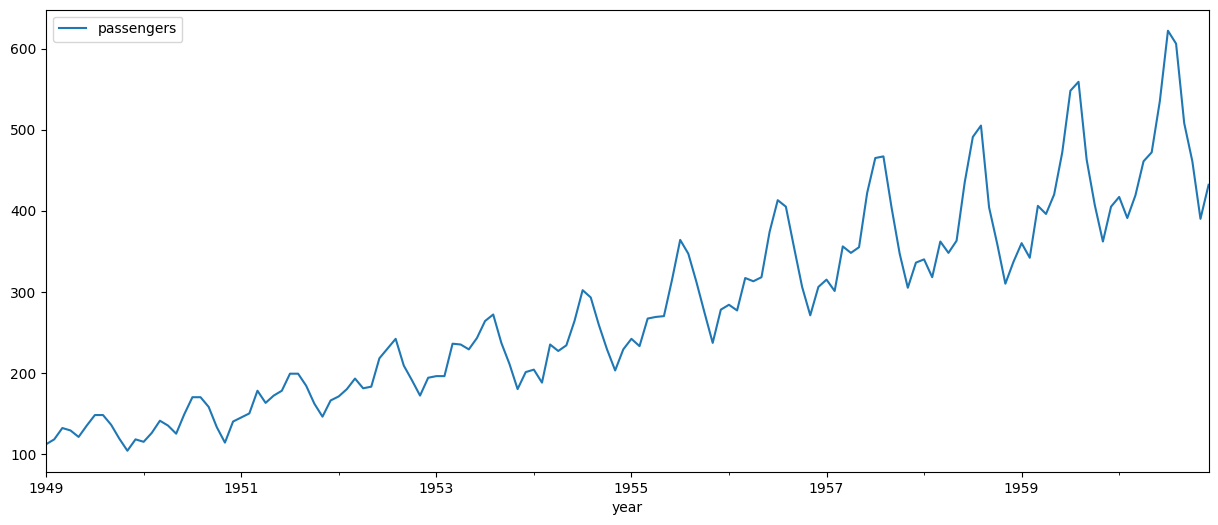

In [12]:
import matplotlib.pyplot as plt
y.plot(figsize=(15, 6))
plt.show()

Stationarity
*   A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
*   Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
*   Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.
*   Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.


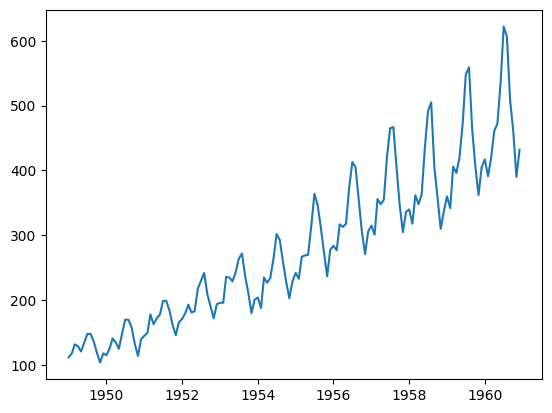

In [13]:
plt.plot(y)

We can check stationarity using the following:
*   ACF and PACF plots: If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
*   Plotting Rolling Statistics: We can plot the moving average or moving
variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.
*   Augmented Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

ACF and PACF plots
*   Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots
*   If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
*   This data is non-stationary as a high number of previous observations are correlated with future values.
*   Confidence intervals are drawn as a cone.
*   By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
*   The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.
    
    
    
    
    



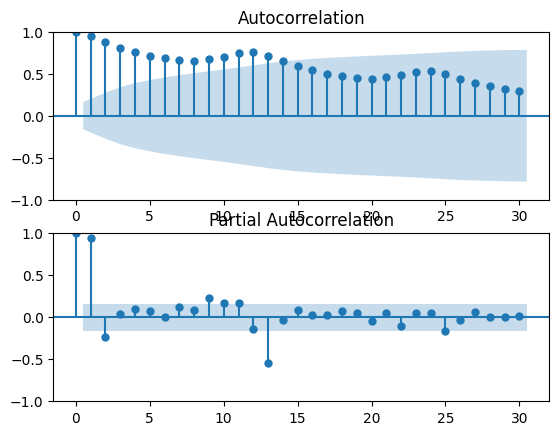

In [14]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(y.passengers, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.passengers, ax=pyplot.gca(), lags = 30)
pyplot.show()

Plotting Rolling Statistics
*   We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
*   The time series is hence not stationary
    

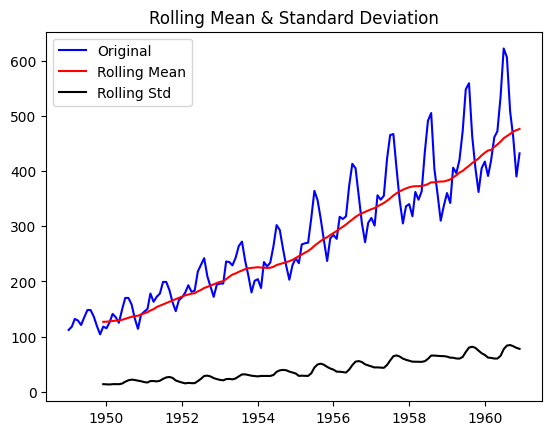

In [15]:
import pandas as pd
#Determing rolling statistics
rolmean = y.rolling(12).mean()
rolstd = y.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


Making Time Series Stationary

There are 2 major reasons behind non-stationaruty of a TS:
*   **Trend** – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
*   **Seasonality** – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

Transformations
*   We can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc.

Lets take a log transform here for simplicity:

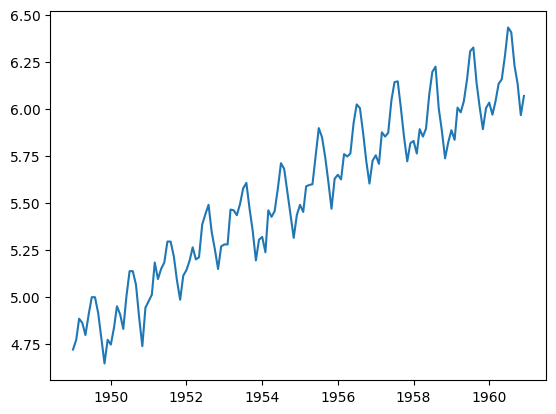

In [16]:
import numpy as np
#Log Scale Transformation
ts_log = np.log(y)
plt.plot(ts_log)

Other possible transformations:
*   Exponential tranformation
*   Box Cox transformation
*   Square root transformation

Techniques to remove Trend - Smoothing
*   Smoothing is taking rolling averages over windows of time

Moving Average
*   We take average of ‘k’ consecutive values depending on the frequency of time series
*   Here we can take the average over the past 1 year, i.e. last 12 values.
*   A drawback in this particular approach is that the time-period has to be strictly defined.

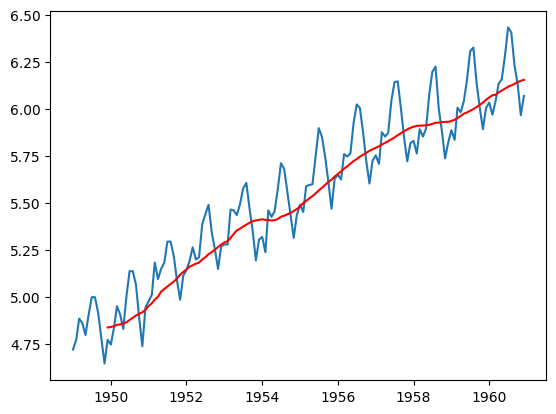

In [17]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

Augmented Dickey-Fuller Test

*   The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1) will provide no relevant information in predicting the change in y(t).
*   Null hypothesis: The time series is not stationary
*   Rejecting the null hypothesis (i.e. a very low p-value) will indicate staionarity

In [18]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y.passengers, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [19]:
ts_log_moving_avg_diff = ts_log.passengers - moving_avg.passengers
ts_log_moving_avg_diff.head(12)

year
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: passengers, dtype: float64

In [20]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

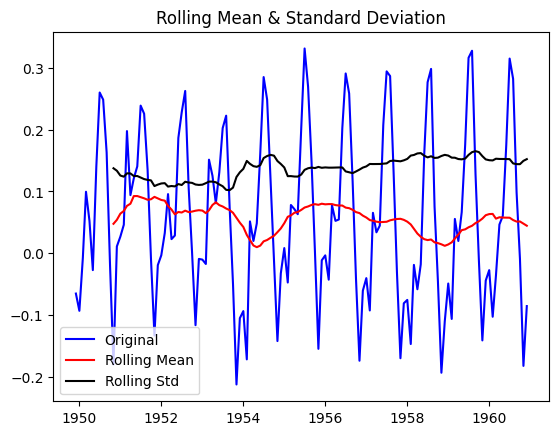

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [21]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

**Exponentially weighted moving average:**
*   To overcome the problem of choosing a defined window in moving average, we can use exponential weighted moving average
*   We take a ‘weighted moving average’ where more recent values are given a higher weight.
*   There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

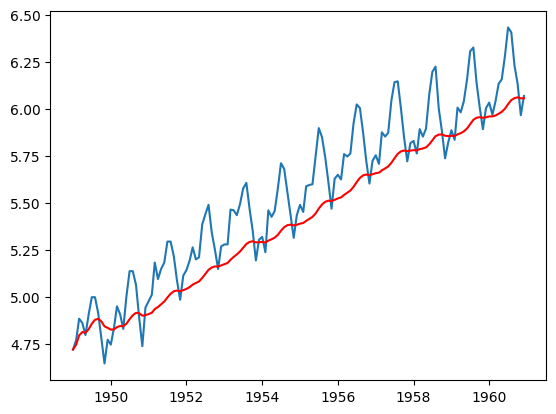

In [22]:
expwighted_avg = ts_log.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

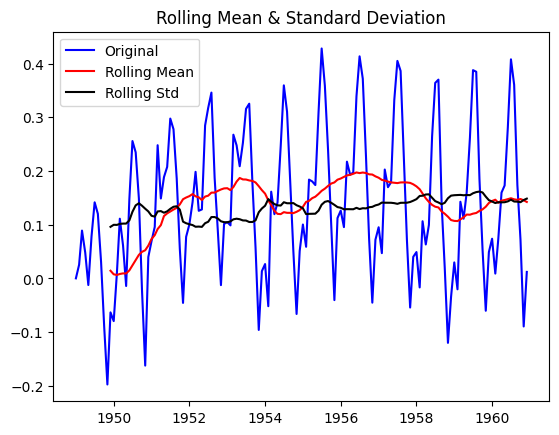

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [23]:
ts_log_ewma_diff = ts_log.passengers - expwighted_avg.passengers
test_stationarity(ts_log_ewma_diff)


**Time Series forecasting**

**Autoregression (AR)**
*   The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.
*   Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).


    
    



In [33]:
from statsmodels.tsa.ar_model import AutoReg
from random import random

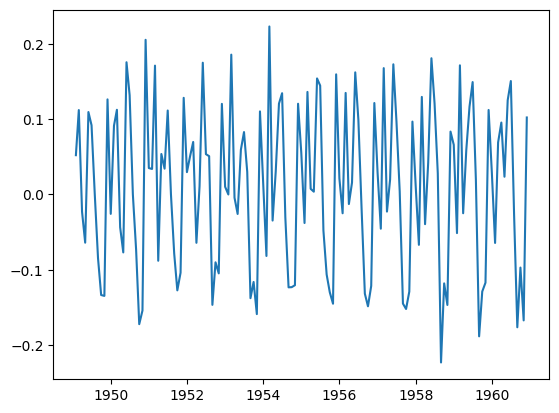

In [34]:
ts_log_diff = ts_log.passengers - ts_log.passengers.shift()
plt.plot(ts_log_diff)

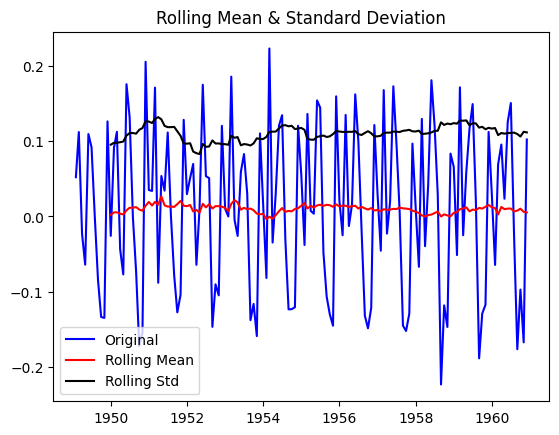

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [35]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [44]:
# fit model
model = AutoReg(ts_log_diff, lags=1)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


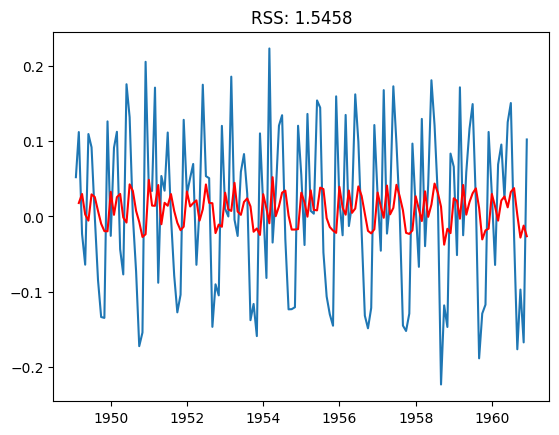

In [45]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))
plt.show()

In [46]:
#Fitted or predicted values:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

year
1949-03-01    0.017854
1949-04-01    0.029889
1949-05-01    0.002758
1949-06-01   -0.005482
1949-07-01    0.029361
dtype: float64


In [48]:
#Cumulative Sum to reverse differencing:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

year
1949-03-01    0.017854
1949-04-01    0.047744
1949-05-01    0.050502
1949-06-01    0.045020
1949-07-01    0.074380
dtype: float64


In [49]:
#Adding 1st month value which was previously removed while differencing:
predictions_ARIMA_log = pd.Series(ts_log.passengers.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

year
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.736353
1949-04-01    4.766243
1949-05-01    4.769001
dtype: float64

In [50]:
#Taking Exponent to reverse Log Transform:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 60.5965')

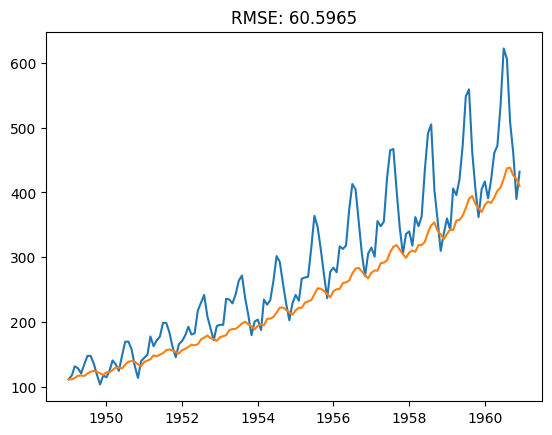

In [51]:
plt.plot(y.passengers)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA-y.passengers)**2)/len(y.passengers)))

**Forecast quality scoring metrics**
*   R squared
*   Mean Absolute Error
*   Median Absolute Error
*   Mean Squared Error
*   Mean Squared Logarithmic Error
*   Mean Absolute Percentage Error

In [52]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [53]:
#R squared, coefficient of determination (it can be interpreted as a percentage of variance explained by the model), (-inf, 1]
r2_score(y.passengers, predictions_ARIMA)

0.7430766444400443

In [54]:
#Mean Absolute Error, it is an interpretable metric because it has the same unit of measurement as the initial series, [0, +inf)
mean_absolute_error(y.passengers, predictions_ARIMA)

43.67326911025331

In [55]:
#Median Absolute Error, again an interpretable metric, particularly interesting because it is robust to outliers, [0, +inf)
median_absolute_error(y.passengers, predictions_ARIMA)

30.922414791180884

In [56]:
#Mean Squared Error, most commonly used, gives higher penalty to big mistakes and vise versa, [0, +inf)
mean_squared_error(y.passengers, predictions_ARIMA)

3671.941745877798

In [57]:
#Mean Squared Logarithmic Error, practically the same as MSE but we initially take logarithm of the series, as a result we give attention to small mistakes as well, usually is used when data has exponential trends, [0, +inf)
mean_squared_log_error(y.passengers, predictions_ARIMA)

0.03456772290120236

In [58]:
#Mean Absolute Percentage Error, same as MAE but percentage, — very convenient when you want to explain the quality of the model to your management, [0, +inf),
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y.passengers, predictions_ARIMA)

13.852796489878266

In [59]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

evaluate_forecast(y.passengers, predictions_ARIMA)

r2_score  mean_absolute_error  median_absolute_error          mse  \
0  0.743077            43.673269              30.922415  3671.941746   

       msle       mape       rmse  
0  0.034568  13.852796  60.596549


**Autoregressive Integrated Moving Average (ARIMA)**

In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.
*   Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
*   Number of Differences (d): d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
*   Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

Observations from EDA on the time series:
*   Non stationarity implies at least one level of differencing (d) is required in ARIMA
*   The next step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively, using PACF, ACF plots

Tuning ARIMA parameters

Note: A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle. ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.


In [60]:
ts = y.passengers - y.passengers.shift()
ts.dropna(inplace=True)

**ACF and PACF plots after differencing:**
*   Confidence intervals are drawn as a cone.
*   By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
*   AR(1) process -- has ACF tailing out and PACF cutting off at lag=1
*   AR(2) process -- has ACF tailing out and PACF cutting off at lag=2
*   MA(1) process -- has ACF cut off at lag=1
*   MA(2) process -- has ACF cut off at lag=2
    



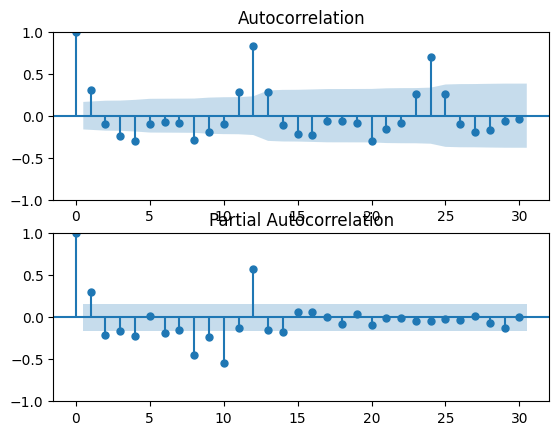

In [61]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts, ax=pyplot.gca(),lags=30)
pyplot.subplot(212)
plot_pacf(ts, ax=pyplot.gca(),lags=30)
pyplot.show()

Interpreting ACF plota

ACF Shape -->	Indicated Model
*   Exponential, decaying to zero --> 	Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model
*   Alternating positive and negative, decaying to zero Autoregressive model --> 	Use the partial autocorrelation plot to help identify the order.
*   One or more spikes, rest are essentially zero --> 	Moving average model, order identified by where plot becomes zero
*   Decay, starting after a few lags 	--> Mixed autoregressive and moving average (ARMA) model
*   All zero or close to zero  --> 	Data are essentially random
*   High values at fixed intervals -->	Include seasonal autoregressive term.
*   No decay to zero 	--> Series is not stationary

<Axes: xlabel='year'>

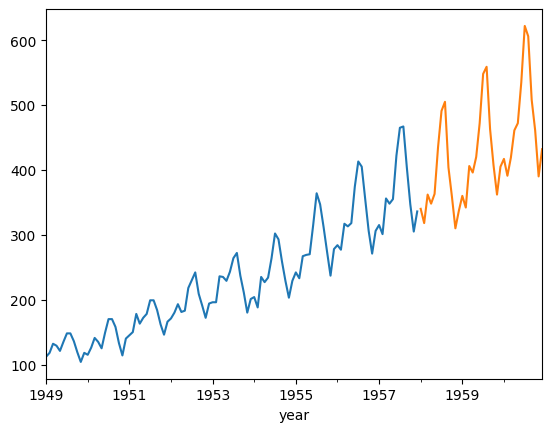

In [62]:
#divide into train and validation set
train = y[:int(0.75*(len(y)))]
valid = y[int(0.75*(len(y))):]

#plotting the data
train['passengers'].plot()
valid['passengers'].plot()

In [79]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  107
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -493.230
Method:                       css-mle   S.D. of innovations             23.986
Date:                Sun, 09 Oct 2022   AIC                            994.461
Time:                        15:26:27   BIC                           1005.152
Sample:                    02-01-1949   HQIC                           998.795
                         - 12-01-1957                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4356      0.265      9.186      0.000       1.916       2.955
ar.L1.D.passengers     0.7409      0.067     10.991      0.000       0.609       0.873
ma.L1.D.passengers    -1.0000      0.025    -39.435      0.000      -1.050      -0.950
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3496           +0.0000j            1.3496            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [80]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
predictions = model_fit.predict(start=start_index, end=end_index)

In [82]:
# report performance
mse = mean_squared_error(y[start_index:end_index], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 109.89878140090688, MSE:12077.742153404317


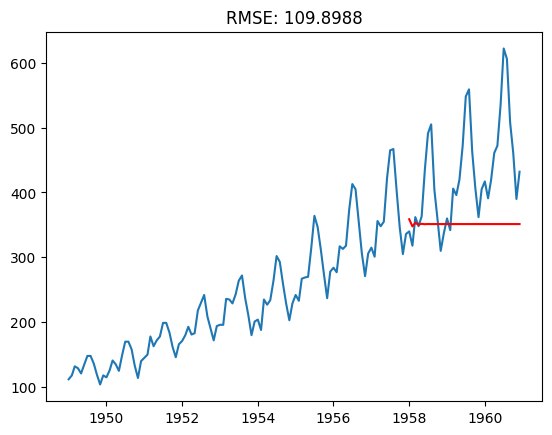

In [83]:
plt.plot(y.passengers)
plt.plot(predictions, color='red')
plt.title('RMSE: %.4f'% rmse)
plt.show()

In [84]:
#Fitted or predicted values:
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
print (predictions_ARIMA_diff.head())

1958-01-01    358.724115
1958-02-01    347.689827
1958-03-01    353.047814
1958-04-01    350.446104
1958-05-01    351.709432
Freq: MS, Name: predicted_mean, dtype: float64


In [85]:
#Cumulative Sum to reverse differencing:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

1958-01-01     358.724115
1958-02-01     706.413943
1958-03-01    1059.461757
1958-04-01    1409.907860
1958-05-01    1761.617292
Freq: MS, Name: predicted_mean, dtype: float64


In [93]:
#Adding 1st month value which was previously removed while differencing:
predictions_ARIMA_log = pd.Series(valid.passengers.iloc[0], index=valid.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA_log.head()

year
1958-01-01    698.724115
1958-02-01    687.689827
1958-03-01    693.047814
1958-04-01    690.446104
1958-05-01    691.709432
dtype: float64

Text(0.5, 1.0, 'RMSE: 346.5012')

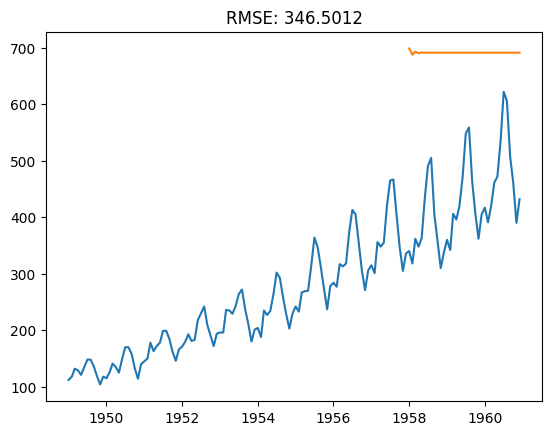

In [94]:
#Taking Exponent to reverse Log Transform:
plt.plot(y.passengers)
plt.plot(predictions_ARIMA_log)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA_log-ts)**2)/len(ts)))

In [95]:
evaluate_forecast(y[start_index:end_index], predictions_ARIMA_log)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


r2_score  mean_absolute_error  median_absolute_error           mse  \
0 -11.303047           262.935384             279.296499  75273.803207   

       msle  mape        rmse  
0  0.274576   NaN  274.360717